In [154]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")

In [155]:
SharpeNT = np.nanmean(df['NT_DayReturns']) / np.nanstd(df['NT_DayReturns'])
SharpeVI = np.nanmean(df['VI_DayReturns']) / np.nanstd(df['VI_DayReturns'])
SharpeTF = np.nanmean(df['TF_DayReturns']) / np.nanstd(df['TF_DayReturns'])

print('Daily Sharpe ratios')
print(SharpeNT, SharpeVI, SharpeTF)


print('Annualised Sharpe ratios')
def annualiseSharpe(sharpe):
    return sharpe * np.sqrt(252)

print(annualiseSharpe(SharpeNT), annualiseSharpe(SharpeVI), annualiseSharpe(SharpeTF))

# print('Maartens formulation TF NT VI')
# TF = (np.nanprod(df['TF_DayReturns']) - 1) ** (1/len(df))
# print(TF)
# TF = (np.nanprod(df['NT_DayReturns']) - 1) ** (1/len(df))
# print(TF)
# TF = (np.nanprod(df['VI_DayReturns']) - 1) ** (1/len(df))
# print(TF)



print('with the new formula for TF, NT, VI')
TF = (np.nanprod(df['TF_DayReturns'] + 1)) ** (1/len(df)) - 1
print(TF)
TF = (np.nanprod(df['NT_DayReturns'] + 1)) ** (1/len(df)) - 1
print(TF)
TF = (np.nanprod(df['VI_DayReturns'] + 1)) ** (1/len(df)) - 1
print(TF)

Daily Sharpe ratios
0.02684777431515542 0.022898995683267993 0.04165932832564488
Annualised Sharpe ratios
0.4261952045609322 0.36351028710641214 0.6613213352138712
with the new formula for TF, NT, VI
-1.3906185927670123e-05
0.00043479899924459
0.000309296739894549


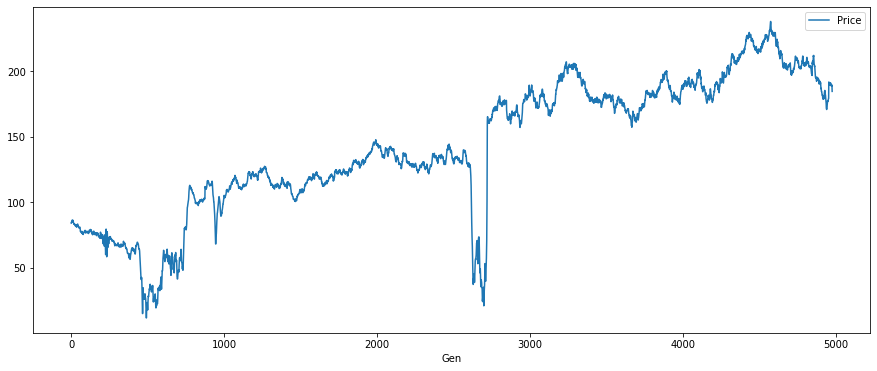

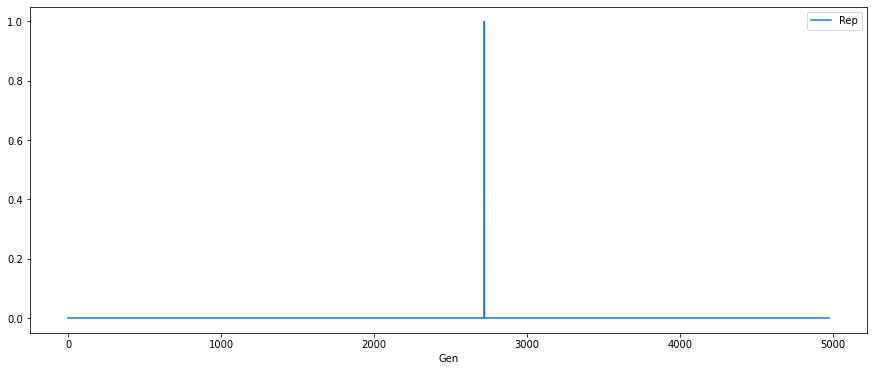

In [156]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()




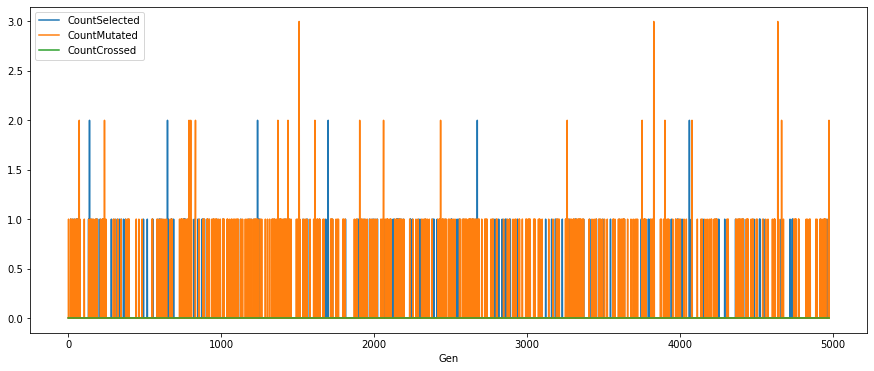

Strategy outflows


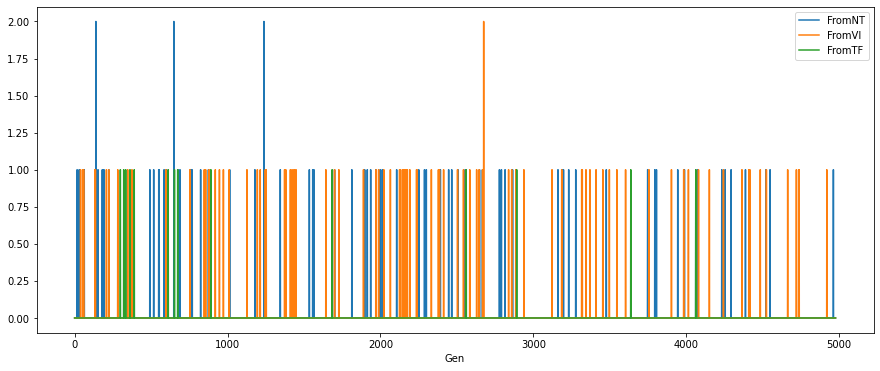

Strategy inflows


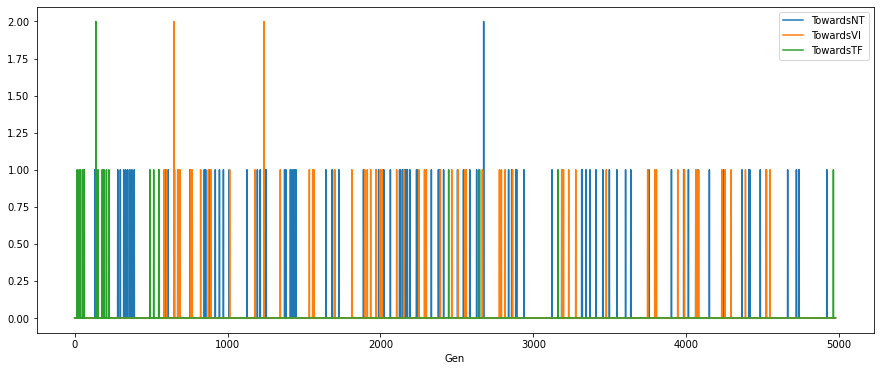

In [157]:
df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
        kind="line", figsize=(15, 6))
plt.show()
print('Strategy outflows')
df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
        kind="line", figsize=(15, 6))
plt.show()
print('Strategy inflows')
df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
        kind="line", figsize=(15, 6))
plt.show()

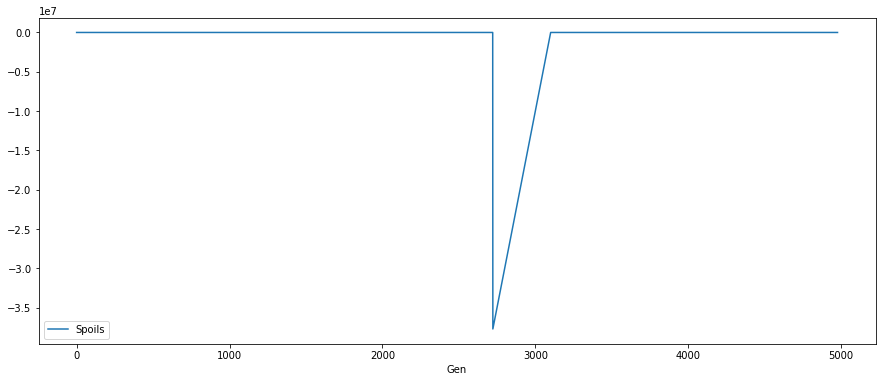

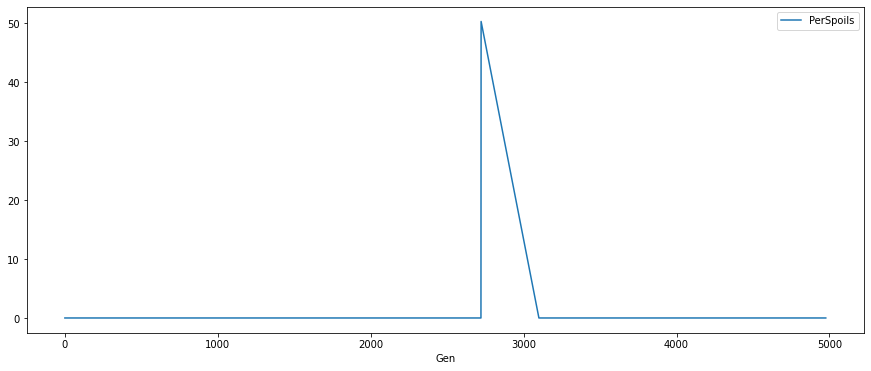

In [158]:

if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

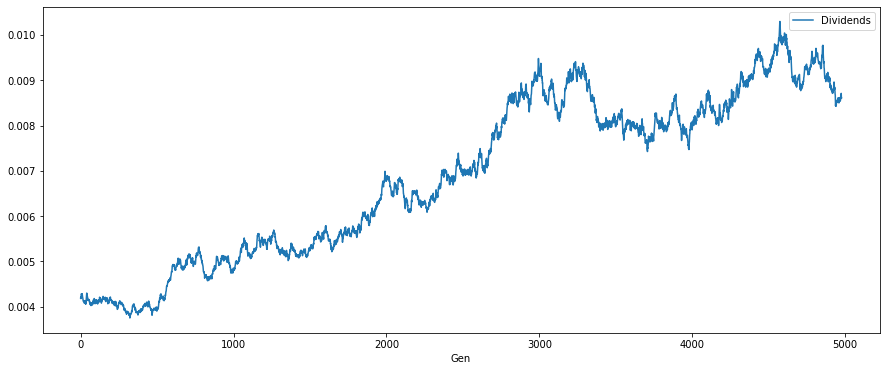

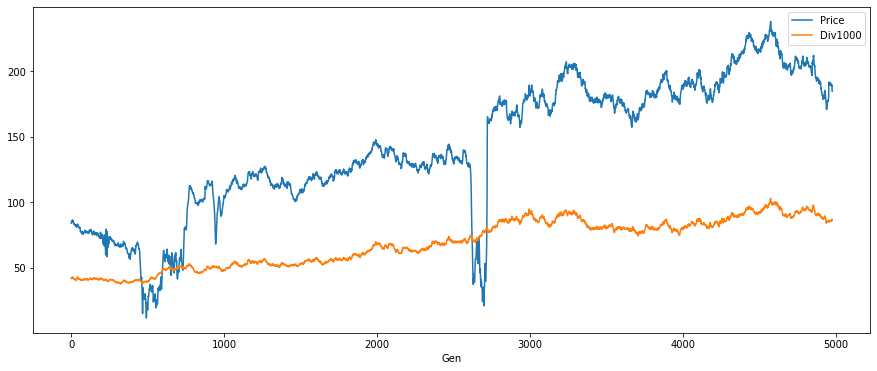

In [159]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()


df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()




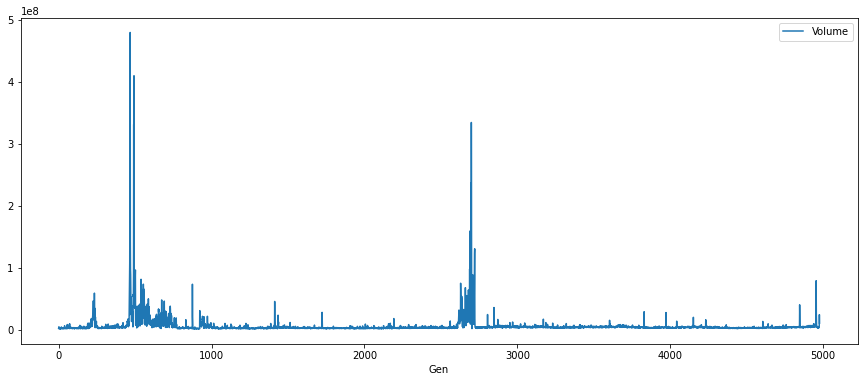

In [160]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

In [161]:
window = 21  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window
time_horizon = 252 

# df['log_rtn'] = np.log(df['Price']).diff()
# df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
# df['real_vol'] = np.sqrt(df['real_var'])

# df['real_var'] = np.square(df['log_rtn']).rolling(window).sum() * ann_factor
# df['real_vol'] = np.sqrt(df['real_var'])

# df.plot(x="Gen", y = ['real_vol'],
#         kind="line", figsize=(15, 6))
# plt.show()


# corr = df['real_vol'].corr(df['Volume'])
# print(corr)
# df['Volatility (1Y EMA, x2M)'] = pd.Series.ewm(2000000 * df['real_vol'], span=time_horizon).mean()
# df['Volume (1Y EMA)'] = pd.Series.ewm(df['Volume'], span=time_horizon).mean()
# df.plot(x="Gen", y = ["Volatility (1Y EMA, x2M)", "Volume (1Y EMA)"],
#         kind="line", figsize=(15, 6))
# # plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/volume_volatility.png', dpi = 300)
# plt.show()


# corr = df['real_vol'].corr(df['AvgMonReturn'])
# print(corr)
# df['Average Monthly Returns (10Y EMA, %)'] = pd.Series.ewm(100 * df['AvgMonReturn'], span=10*time_horizon).mean()[50:]
# df['Volatility (1Y EMA, x10)'] = pd.Series.ewm(10 * df['real_vol'], span=time_horizon).mean()[50:]
# df.plot(x="Gen", y = ["Volatility (1Y EMA, x10)", "Average Monthly Returns (10Y EMA, %)"],
#         kind="line", figsize=(15, 6))
# # plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/returns_volatility.png', dpi = 300)
# plt.show()



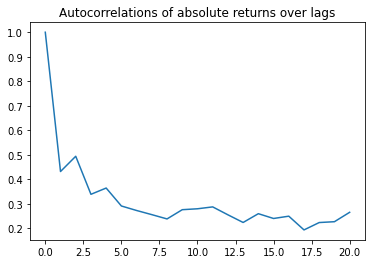

kurtosis: 195.2233313937571
skewness: 9.940788024365382
mean/std ratio
0.06707138835853668


In [162]:
''' Slow decay of autocorrelation in absolute returns '''

absolute_autocorrelations = []
for i in range(21):
        absolute_autocorrelations.append(abs(df['AvgDayReturn']).autocorr(lag=i))
plt.plot(absolute_autocorrelations)
plt.title('Autocorrelations of absolute returns over lags')
plt.show()

''' Heavy tails '''

kurtosis = df['AvgDayReturn'].kurtosis()
print('kurtosis: ' + str(kurtosis))
skew = df['AvgDayReturn'].skew()
print('skewness: ' + str(skew))

print('mean/std ratio')
print(df['AvgDayReturn'].mean() / df['AvgDayReturn'].std())


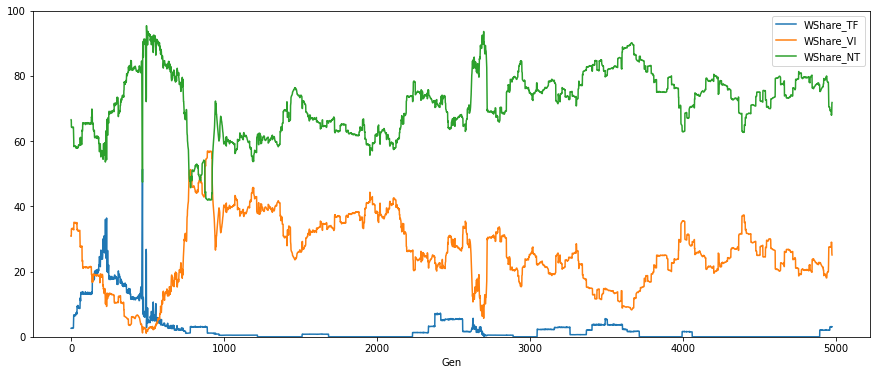

In [163]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()




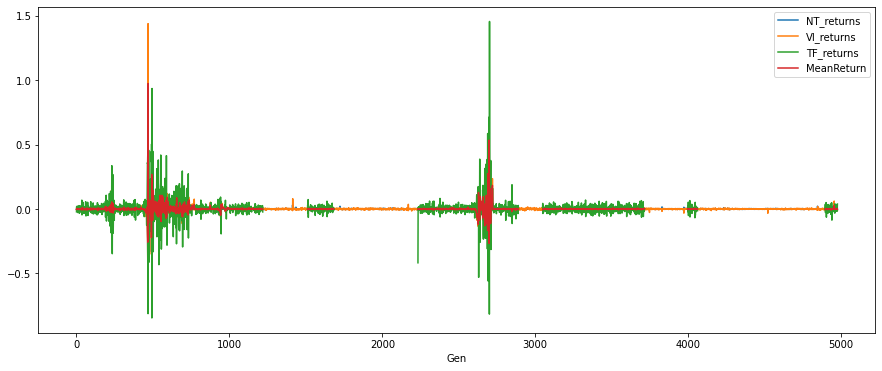

In [164]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

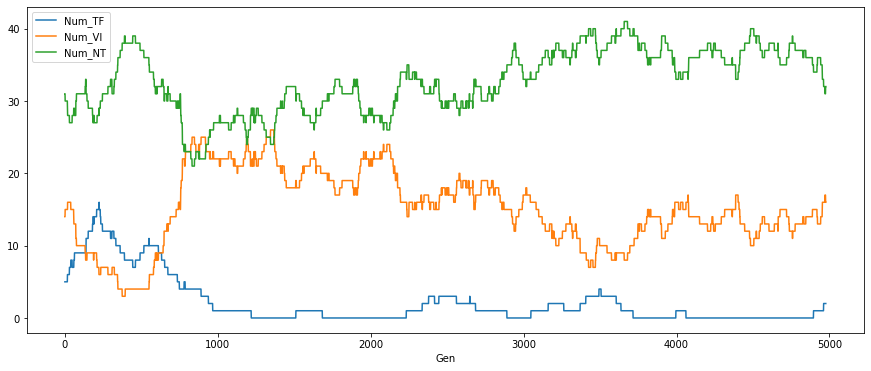

In [165]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


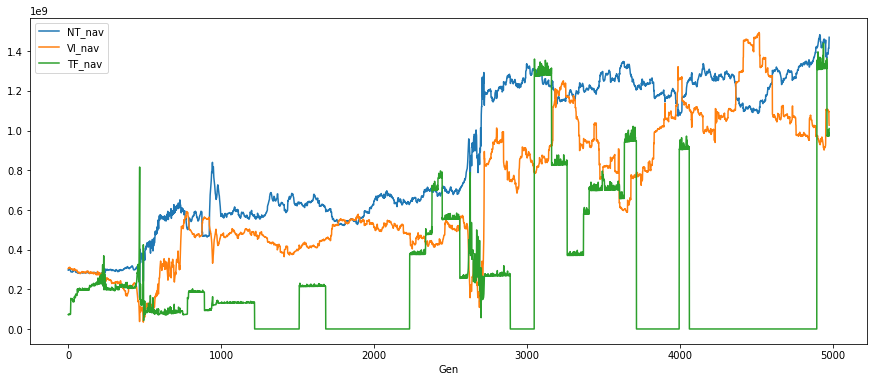

In [166]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


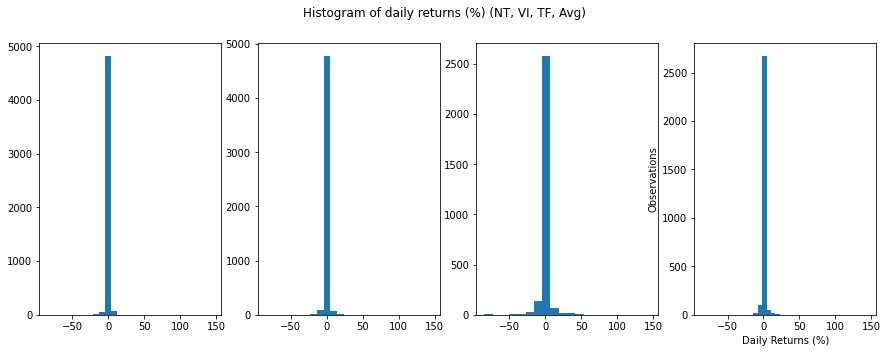

In [167]:
''' Histogram of the daily strategy returns '''

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5), sharex = True)
fig.suptitle('Histogram of daily returns (%) (NT, VI, TF, Avg)')
ax1.hist(100 * df['NT_returns'], bins = 20)
ax2.hist(100 * df['VI_returns'], bins = 20)
ax3.hist(100 * df['TF_returns'], bins = 20)
ax4.hist(100 * df['MeanReturn'], bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Daily Returns (%)')
plt.show()






0.0007808222419530126
0.000758984672179813
0.0030689573166959687
0.0018514204652881148


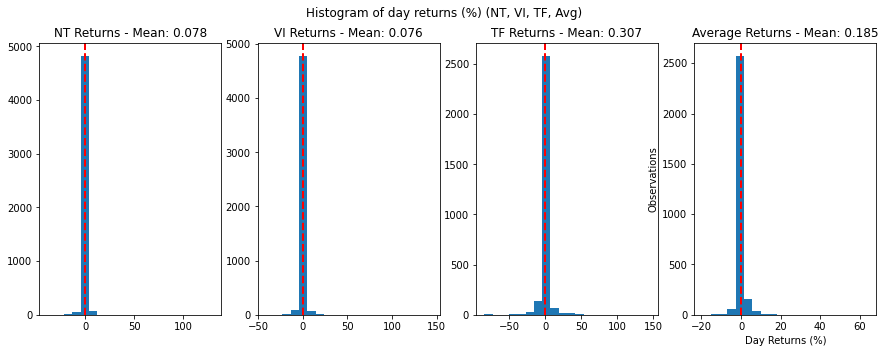

In [168]:
print(df['NT_DayReturns'].mean())
print(df['VI_DayReturns'].mean())
print(df['TF_DayReturns'].mean())
print(df['AvgDayReturn'].mean())

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of day returns (%) (NT, VI, TF, Avg)')
ax1.hist(100 * df['NT_DayReturns'], bins = 20)
ax1.axvline(x=100 * df['NT_DayReturns'].mean(), color='r', linestyle='dashed', linewidth=2)
num = 100 * df['NT_DayReturns'].mean()
ax1.set_title('NT Returns - Mean: %1.3f' % num)

ax2.hist(100 * df['VI_DayReturns'], bins = 20)
num = 100 * df['VI_DayReturns'].mean()
ax2.set_title('VI Returns - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_DayReturns'], bins = 20)
num = 100 * df['TF_DayReturns'].mean()
ax3.set_title('TF Returns - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax4.hist(100 * df['AvgDayReturn'], bins = 20)
num = 100 * df['AvgDayReturn'].mean()
ax4.set_title('Average Returns - Mean: %1.3f' % num)
ax4.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax4.set_ylabel('Observations')
ax4.set_xlabel('Day Returns (%)')
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/hist_returns.png')
plt.show()

# time_horizon = 252

# df['NT_MonReturns_ema'] = pd.Series.ewm(100 * df['NT_MonReturns'], span=time_horizon).mean()
# df['VI_MonReturns_ema'] = pd.Series.ewm(100 * df['VI_MonReturns'], span=time_horizon).mean()
# df['TF_MonReturns_ema'] = pd.Series.ewm(100 * df['TF_MonReturns'], span=time_horizon).mean()
# df['AvgMonReturn_ema'] = pd.Series.ewm(100 * df['AvgMonReturn'], span=time_horizon).mean()

# ''' Evolution of returns over time '''
# df.plot(x="Gen", y = ["NT_MonReturns_ema", "VI_MonReturns_ema", "TF_MonReturns_ema", "AvgMonReturn_ema"],
#         kind="line", figsize=(15, 6))
# plt.show()



In [169]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.5401282860048116
